# LearnIQ Engine  
## AI-Driven Personalized Learning from Academic PDFs

**Student_name**: Aritra Jana\
**Student_code**: iitrpr_ai_25010245\
**Batch**: 4\
**Track:** AI in Personalised Learning  

## 1. Introduction

In modern academic environments, students heavily depend on large PDF-based
resources such as lecture notes, textbooks, and reference materials.
Although these resources are information-rich, they are often difficult
to navigate, revise, and self-evaluate effectively.

As a B.Tech student managing multiple subjects in a semester, I personally
faced difficulty in:
- Tracking subject-wise progress
- Identifying which topics require more focus
- Performing regular self-evaluation after studying
- Converting large PDFs into actionable learning plans

This project, **LearnIQ Engine**, is inspired directly by this real-world
learning challenge. It proposes an AI-driven system that transforms any
academic PDF into structured study notes, self-assessment tests,
performance analytics, and personalized visual learning aids.

## 2. Problem Statement

Students frequently study from large academic PDFs without a clear
mechanism to:
- Extract important concepts automatically
- Structure learning material for efficient revision
- Evaluate topic-wise understanding at regular intervals
- Visualize learning gaps for targeted improvement

Due to the absence of continuous self-realisation mechanisms, students
often realize their weak areas only after examinations, which limits
their ability to improve during the learning phase.

This project addresses this problem by designing an AI-based personalised
learning system that enables continuous understanding, assessment, and
self-guided improvement directly from academic PDFs.

## 3. Objectives

The key objectives of this project are:
- To automatically extract important learning content from academic PDFs
- To restructure unorganized text into readable study notes
- To generate AI-based mock tests for self-assessment
- To analyze student performance at a topic level
- To visualize personalized learning outcomes using mind maps

## 4. System Architecture

PDF  
→ Text Extraction  
→ Text Cleaning & Tokenisation  
→ TF-IDF Importance Scoring  
→ Content Structuring  
→ Topic Discovery  
→ Interactive Assessment  
→ Performance Analysis  
→ Accuracy Visualisation  
→ Personalised Mind Map

## 5. AI Techniques Used

- Natural Language Processing (NLP)
- TF-IDF Vectorisation
- Unsupervised Learning (K-Means Clustering)
- Rule-based Question Generation
- Graph-based Visualisation (NetworkX)

### Imports

In [1]:
# Core libraries
import re
import random
import numpy as np
import textwrap

# PDF processing
import pdfplumber

# NLP
import nltk
nltk.download('punkt')

# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt
import networkx as nx

from collections import defaultdict

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aritrajana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 6. Data Understanding & Preparation

### Dataset Source
The dataset consists of academic PDF documents such as lecture notes and
textbooks provided by the user. The data is unstructured and text-based.

### Nature of Data
- Long textual content
- Mixed explanations, examples, and code snippets
- No predefined labels

### PDF text extraction

In [2]:
def extract_text_from_pdf(pdf_path):
    """Extracts text from all pages of an academic PDF."""
    full_text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                full_text += page_text + " "
    return full_text

pdf_path = "chapter-4.pdf"
raw_text = extract_text_from_pdf(pdf_path)

### Text cleaning & tokenization

In [3]:
def clean_text(text):
    """Cleans raw text by normalizing case, removing extra spaces,and filtering unnecessary symbols."""
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9. ]', '', text)
    return text

cleaned_text = clean_text(raw_text)
sentences = nltk.sent_tokenize(cleaned_text)

## 7. Content Type Separation

Academic PDFs often mix explanations, diagrams, and code.
To improve readability, the content is separated into:
- Conceptual explanations
- Diagram / visual references
- Code / syntax snippets

In [4]:
conceptual_sentences = []
diagram_sentences = []
code_sentences = []

diagram_keywords = [
    "figure", "diagram", "table", "stack", "heap", "memory", "layout", "segment"
]

code_patterns = [
    "int ", "float ", "char ", "void ", "return", "printf",
    "scanf", "malloc", "free", "{", "}", ";"
]

for s in sentences:
    s_lower = s.lower()
    if any(p in s_lower for p in code_patterns):
        code_sentences.append(s)
    elif any(k in s_lower for k in diagram_keywords):
        diagram_sentences.append(s)
    elif len(s.split()) > 6:
        conceptual_sentences.append(s)

### TF-IDF Scoring

In [5]:
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(sentences)
scores = np.array(tfidf_matrix.sum(axis=1)).flatten()

### Selection of Important Sentences

In [6]:
important_sentences = sorted(
    zip(sentences, scores),
    key=lambda x: x[1],
    reverse=True
)[:20]

## 8. Content Structuring Module

Important sentences are reformatted into readable, structured study
notes so that students can first understand the content before
attempting assessments.

### Structured Notes

In [7]:
structured_notes = {
    "Conceptual Explanations": [],
    "Diagram References": [],
    "Code Snippets": []
}

for s, _ in important_sentences:
    if s in conceptual_sentences:
        structured_notes["Conceptual Explanations"].append(s.capitalize())
    elif s in diagram_sentences:
        structured_notes["Diagram References"].append(s)
    elif s in code_sentences:
        structured_notes["Code Snippets"].append(s)

## 9. Automatic Topic Discovery

Unsupervised clustering is used to group semantically similar sentences
into latent topics. This makes the system generic and independent of
any specific subject or PDF.

### Topic Clustering

In [8]:
texts = [s for s, _ in important_sentences]

vectorizer = TfidfVectorizer(stop_words='english', max_features=300)
X = vectorizer.fit_transform(texts)

k = min(4, len(texts))
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

topic_groups = defaultdict(list)
for s, label in zip(texts, labels):
    topic_groups[label].append(s)

## 📘 Summarised Learning Notes (Student View)

This section provides structured and concise study notes extracted
automatically from the uploaded academic PDF.

The content is organised topic-wise and separated into:
- Conceptual explanations
- Diagram references
- Code / syntax snippets

This allows the learner to study first before attempting assessments.

In [10]:
from textwrap import fill

def display_summarised_notes(topic_groups,
                             conceptual_sentences,
                             diagram_sentences,
                             code_sentences,
                             max_items=4):
    """
    Display learner-friendly summarised notes.
    """

    for topic_id, sents in topic_groups.items():
        print("\n" + "="*60)
        print(f"📘 Topic {topic_id + 1} – Key Learning Points")
        print("="*60)

        # Conceptual Notes
        print("\n🔹 Conceptual Explanations:")
        concept_count = 0
        for s in sents:
            if s in conceptual_sentences:
                print("•", fill(s.capitalize(), 90))
                concept_count += 1
            if concept_count == max_items:
                break

        # Diagram References
        print("\n🔹 Diagram / Visual References:")
        diagram_count = 0
        for s in sents:
            if s in diagram_sentences:
                print("•", fill(s, 90))
                diagram_count += 1
            if diagram_count == max_items:
                break

        # Code Snippets
        print("\n🔹 Code / Syntax Snippets:")
        code_count = 0
        for s in sents:
            if s in code_sentences:
                print("•", fill(s, 90))
                code_count += 1
            if code_count == max_items:
                break

display_summarised_notes(
    topic_groups,
    conceptual_sentences,
    diagram_sentences,
    code_sentences
)


📘 Topic 2 – Key Learning Points

🔹 Conceptual Explanations:
• 627 situations requiring feature construction when features have categorical value and
machine learning needs numeric value inputs when features having numeric continuous values
and need to be converted to ordinal values when textspecific feature construction needs to
be done encoding categorical nominal variables example athlete dataset with features cid25
age city of origin parents athlete chance of win.
• City of origin a b c  origin city a origin city b origin city c. parents athlete yn
parents athlete y parents athlete n. chance of win yn  win chance y win chance n. each
dummy variable gets 01 values.

🔹 Diagram / Visual References:

🔹 Code / Syntax Snippets:

📘 Topic 1 – Key Learning Points

🔹 Conceptual Explanations:
• Two major elements 1 feature transformation 2 feature subset selection 427 1. feature
transformation purpose dimensionality reduction improve learning efficiency two approaches
1 feature construction a

## 10. Interactive Assessment Module

This module allows the learner to choose the type of assessment
(Fill-in-the-Blank or MCQ), attempt the test manually, and receive
AI-based evaluation.

## User Interaction Flow

1. The learner uploads an academic PDF.
2. The system extracts and structures key learning content.
3. Topics are automatically discovered.
4. The learner chooses the type of assessment.
5. The learner attempts the test.
6. The system evaluates performance.
7. Personalised feedback and visual insights are generated.

### Question type selector

In [11]:
def choose_test_type():
    print("Choose Test Type:")
    print("1. Fill in the Blanks")
    print("2. Multiple Choice Questions")
    return input("Enter choice (1/2): ")

In [12]:
def generate_fill_blank(sentence):
    words = re.findall(r'\b[a-zA-Z]{4,}\b', sentence)
    if len(words) < 2:
        return None
    ans = random.choice(words)
    return sentence.replace(ans, "_____"), ans

def generate_mcq(sentence, vocab):
    words = re.findall(r'\b[a-zA-Z]{4,}\b', sentence)
    if len(words) < 2:
        return None
    ans = random.choice(words)
    distractors = random.sample([w for w in vocab if w != ans], 3)
    options = distractors + [ans]
    random.shuffle(options)
    return sentence.replace(ans, "_____"), options, ans

In [13]:
vocab = list(set(" ".join(sentences).split()))
from collections import defaultdict

topic_performance = defaultdict(lambda: {"correct": 0, "total": 0})
score = 0
total = 0

choice = choose_test_type()

for topic, sents in topic_groups.items():
    for s in sents[:2]:
        total += 1
        topic_performance[topic]["total"] += 1  

        if choice == "1":
            q, ans = generate_fill_blank(s)
            print("\nQ:", q)
            user = input("Your answer: ").strip().lower()

            if user == ans.lower():
                score += 1
                topic_performance[topic]["correct"] += 1  

        elif choice == "2":
            q, opts, ans = generate_mcq(s, vocab)
            print("\nQ:", q)
            for i, o in enumerate(opts, 1):
                print(f"{i}. {o}")

            user_input = input("Choose option (1-4): ").strip()

            if not user_input.isdigit():
                print("Invalid input. Question skipped.")
            else:
                ui = int(user_input)
                if ui < 1 or ui > len(opts):
                    print("Invalid option selected. Question skipped.")
                elif opts[ui-1].lower() == ans.lower():
                    score += 1
                    topic_performance[topic]["correct"] += 1

topic_analysis = {}

for topic, stats in topic_performance.items():
    if stats["total"] == 0:
        continue

    acc = stats["correct"] / stats["total"]

    level = (
        "Strong" if acc >= 0.75 else
        "Moderate" if acc >= 0.4 else
        "Weak"
    )

    topic_analysis[topic] = {
        "accuracy": round(acc * 100, 2),
        "level": level
    }

topic_analysis

Choose Test Type:
1. Fill in the Blanks
2. Multiple Choice Questions


Enter choice (1/2):  2



Q: 627 situations requiring feature construction when features have categorical value and machine learning needs numeric value inputs when features having numeric continuous values and need to be converted to ordinal values when textspecific feature construction needs to be done _____ categorical nominal variables example athlete dataset with features cid25 age city of origin parents athlete chance of win.
1. encoding
2. singular
3. length
4. patterns


Choose option (1-4):  1



Q: city of origin a b c  origin city a origin city b origin city c. parents athlete yn  parents athlete y parents athlete n. chance of win yn  win chance y win chance n. _____ dummy variable gets 01 values.
1. 1527
2. requiring
3. each
4. values


Choose option (1-4):  3



Q: two major elements 1 feature transformation 2 feature subset selection 427 1. feature transformation purpose dimensionality reduction _____ learning efficiency two approaches 1 feature construction add new features 2 feature extraction derive new features from existing ones 527 1.1 feature construction feature construction involves transforming a given set of input features to generate a new set of more powerful features.
1. improve
2. dimensionality.
3. pc
4. inequality.


Choose option (1-4):  2



Q: it focuses on three key components _____ construction _____ selection _____ transformation 127 introduction machine learning requires preparatory steps before modeling.
1. given
2. feature
3. weakly
4. task


Choose option (1-4):  1



Q: 1 2 2227 a more generalized form of the euclidean distance is the minkowski distance _____ as cid32 n cid33 r 1 cid88 df f  f f r 1 2 1i 2i i1 r2 cid25 euclidean r1 cid25 manhattan special case hamming distance binary vectors.
1. manhattan
2. computationally
3. ordinal.
4. measured


Choose option (1-4):  3



Q: mutual information can be calculated as follows micfhchfhcf where _____ entropy of the class k cid88 hc pc log pc  i 2 i i1 _____ entropy of the feature x cid88 hf pf xlog pf x 2 c and k  number of classes c  class variable f  feature set that take discrete values.
1. marginal
2. the
3. improved
4. stop


Choose option (1-4):  2



Q: 1 1 2 1227 lets discuss the _____ popular feature extraction algorithms used in machine learning principal component analysis many dataset features are correlated e.g.
1. converting
2. most
3. translating
4. cid117cid88


Choose option (1-4):  3



Q: 727 827 encoding categorical ordinal _____ example student dataset  science marks maths marks grade.
1. boolean
2. similarity.
3. variables
4. feature


Choose option (1-4):  2


{np.int32(1): {'accuracy': 100.0, 'level': 'Strong'},
 np.int32(0): {'accuracy': 0.0, 'level': 'Weak'},
 np.int32(2): {'accuracy': 0.0, 'level': 'Weak'},
 np.int32(3): {'accuracy': 0.0, 'level': 'Weak'}}

In [14]:
accuracy = (score / total) * 100

def feedback(acc):
    if acc >= 80:
        return "🌟 Excellent work!"
    elif acc >= 50:
        return "👍 Good effort, revise weak areas."
    else:
        return "⚠️ Needs improvement."

print("Score:", score, "/", total)
print("Accuracy:", round(accuracy, 2), "%")
print("Rating:", "⭐" * int(accuracy // 20))
print("Feedback:", feedback(accuracy))

Score: 2 / 8
Accuracy: 25.0 %
Rating: ⭐
Feedback: ⚠️ Needs improvement.


## 12. Topic-wise Accuracy Visualization

### Bar Graph

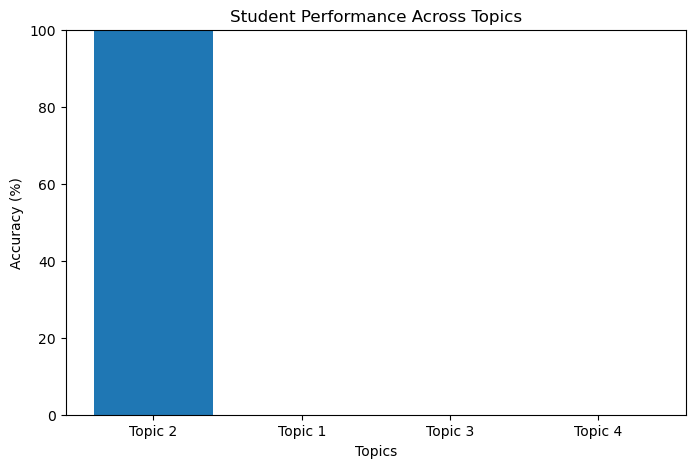

In [15]:
topics = [f"Topic {t+1}" for t in topic_analysis.keys()]
accuracies = [v["accuracy"] for v in topic_analysis.values()]

plt.figure(figsize=(8,5))
plt.bar(topics, accuracies)
plt.ylim(0,100)
plt.xlabel("Topics")
plt.ylabel("Accuracy (%)")
plt.title("Student Performance Across Topics")
plt.show()

## 13. Personalized Mind Map Generation

### Cleaned Mind Map

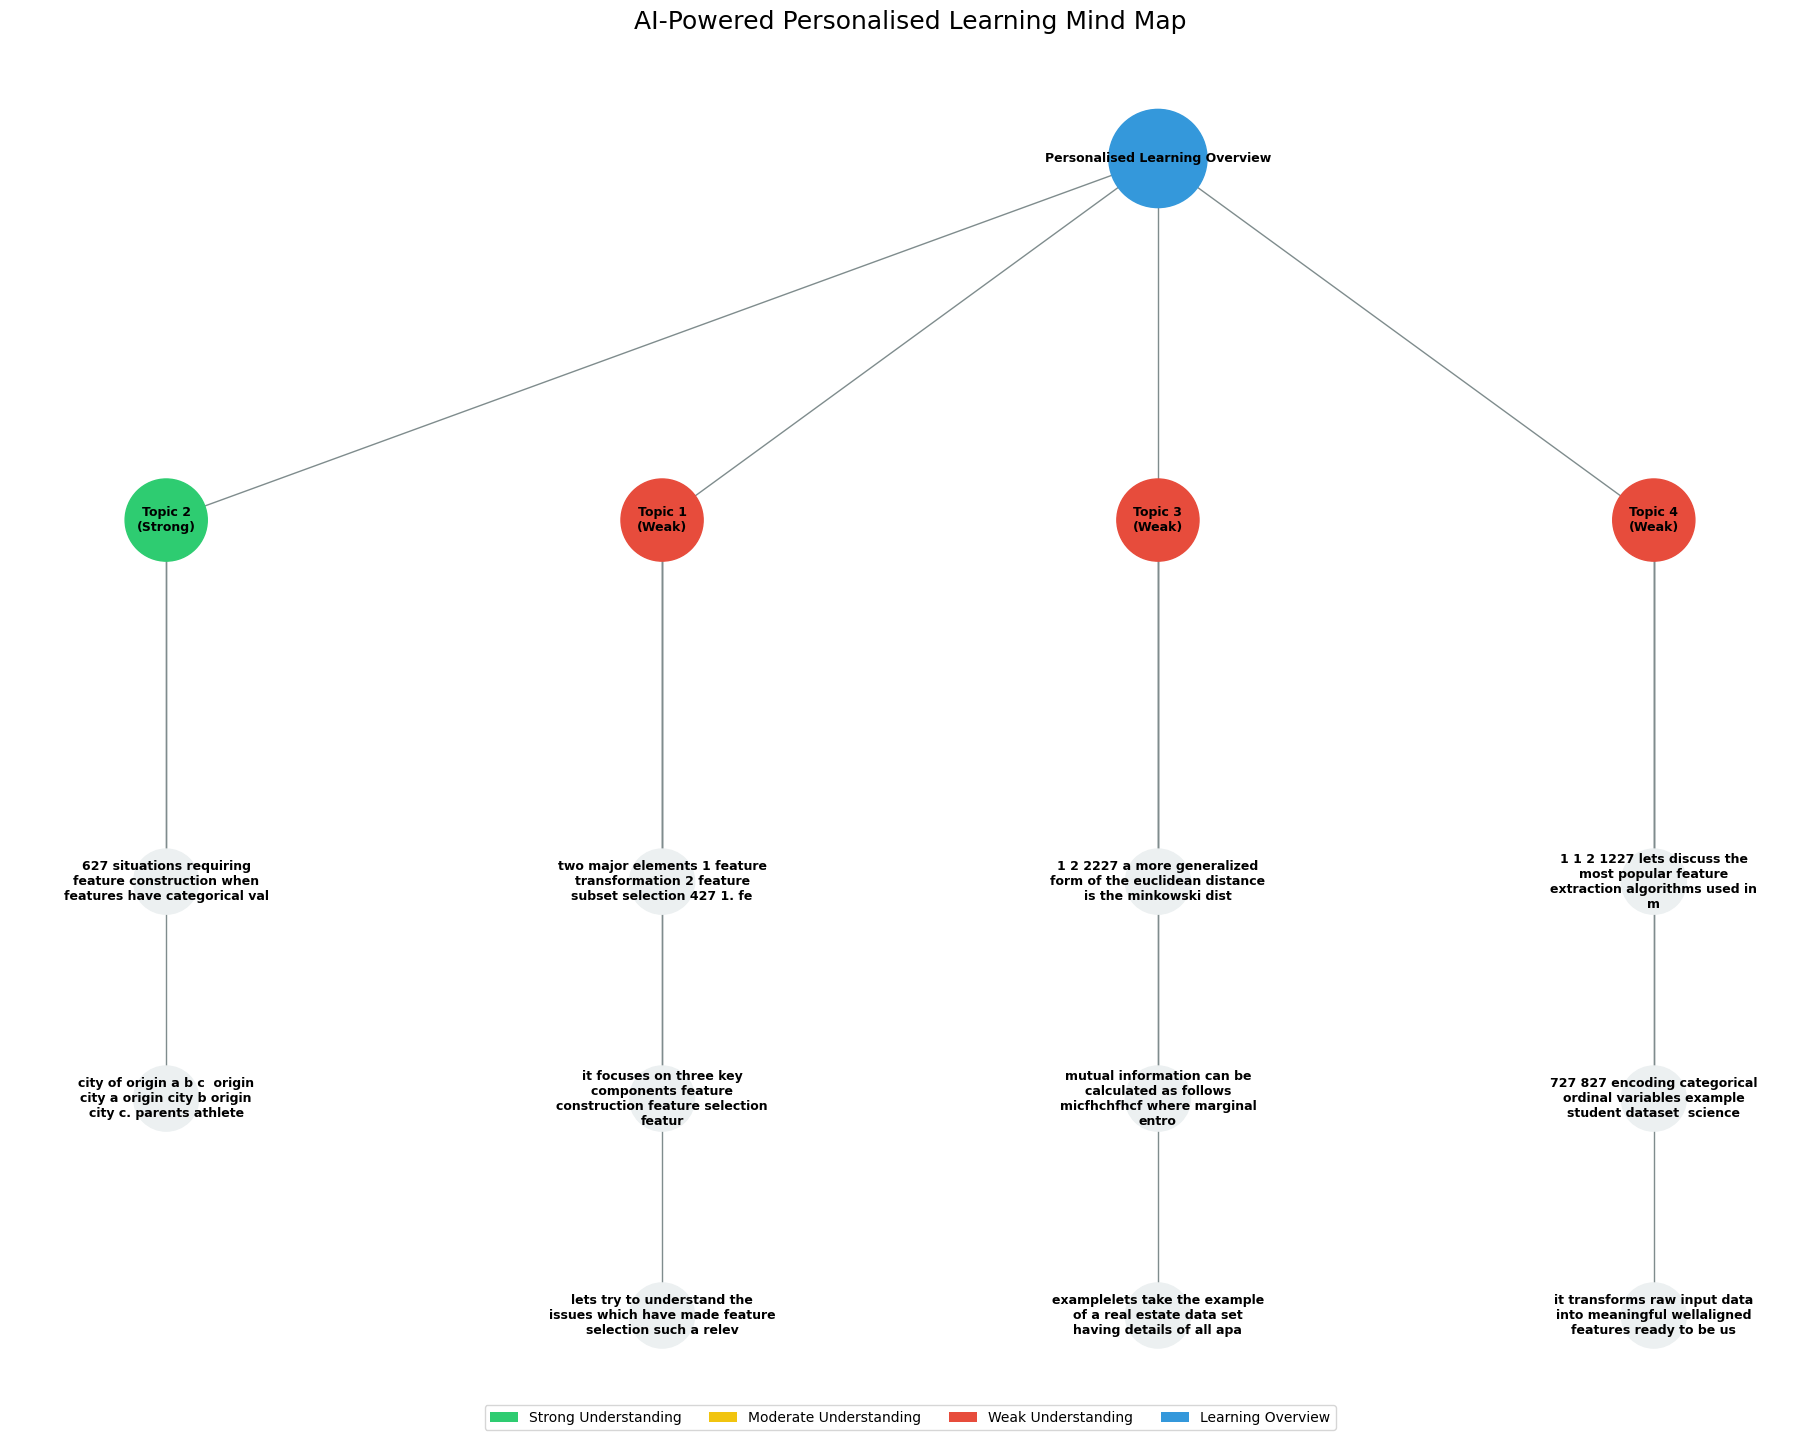

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create graph
G = nx.Graph()
root = "Personalised Learning Overview"
G.add_node(root)

# Position dictionary
pos = {root: (0, 0)}

# Colors based on performance
def get_color(level):
    if level == "Strong":
        return "#2ecc71"   # green
    elif level == "Moderate":
        return "#f1c40f"   # yellow
    else:
        return "#e74c3c"   # red

# Build graph
x_spacing = 4
y_topic = -2
y_leaf_start = -4

for i, (topic, info) in enumerate(topic_analysis.items()):
    topic_node = f"Topic {topic+1}\n({info['level']})"
    G.add_edge(root, topic_node)

    pos[topic_node] = ((i - len(topic_analysis)/2) * x_spacing, y_topic)

    # Add key sentences as leaf nodes (limited for clarity)
    leaf_sentences = topic_groups[topic][:3]

    for j, sent in enumerate(leaf_sentences):
        wrapped = "\n".join(textwrap.wrap(sent[:80], 30))
        G.add_edge(topic_node, wrapped)
        pos[wrapped] = (
            pos[topic_node][0],
            y_leaf_start - j * 1.2
        )

# Draw nodes
plt.figure(figsize=(18, 14))

node_colors = []
node_sizes = []

for node in G.nodes():
    if node == root:
        node_colors.append("#3498db")   # blue
        node_sizes.append(5000)
    elif "Topic" in node:
        level = node.split("(")[-1].replace(")", "")
        node_colors.append(get_color(level))
        node_sizes.append(3500)
    else:
        node_colors.append("#ecf0f1")   # light grey
        node_sizes.append(2200)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    edge_color="#7f8c8d",
    font_size=9,
    font_weight="bold"
)

plt.title("AI-Powered Personalised Learning Mind Map", fontsize=18)
plt.axis("off")

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#2ecc71", label="Strong Understanding"),
    Patch(facecolor="#f1c40f", label="Moderate Understanding"),
    Patch(facecolor="#e74c3c", label="Weak Understanding"),
    Patch(facecolor="#3498db", label="Learning Overview")
]

plt.legend(handles=legend_elements, loc="lower center", ncol=4)
plt.show()